### Problem 1

a) Given the regression models for the response $Y$ and single covariate $x$, we can write the following as linear regression models as is (i):

$$\text{2.} \quad Y = \beta_0 + \beta_1 \frac{1}{x} + \beta_2 x^2 + \varepsilon$$

If a parameter is kept fixed (ii):
\begin{align*}\text{1.} \quad Y &= \frac{\beta_0}{1 + \beta_1 x} + \beta_2 x^{1/2} + \varepsilon\\
& \Downarrow \quad Z = \frac{1}{1 + \beta_1 x} \quad | \ \beta_1 \text{ fixed}\\
Y &= \beta_0 Z + \beta_2 x^{1/2} + \varepsilon \end{align*}

$$\text{4.} \quad Y = \beta_0 + \beta_1 x^{\beta_2} + \varepsilon \quad | \ \beta_2 \text{ fixed}$$

After a suitable transformation (iii):
\begin{align*}\text{3.} \quad Y &= \frac{1}{\beta_0 + \beta_1 x + \beta_2 x^2 + \varepsilon} \\
&\Downarrow \ Z = (Y^{-1}) \\
Z &= \beta_0 + \beta_1 x + \beta_2 x^2 + \varepsilon \end{align*}

\begin{align*}\text{5.} \quad Y &= \beta_0 x^{\beta_1} \varepsilon\\
&\Downarrow \ Z = (\ln{Y})\\
Z &= \ln(\beta_0) + \beta_1 \ln(x) + \ln(\varepsilon) \end{align*}

Note: For 5. we are assuming here that $\ln(\varepsilon)$ is from the same distribution as $\varepsilon$.

b) For the models that can be used, their dimensions will be
* For 1. (after transformation) $\quad \mathbf{X}: \ (N \times 2)$ matric (without intercept), $\quad \beta: \ (2 \times 1)$ vector
* For 2. $\quad \mathbf{X}: \ (N \times 3)$ matrix (with intercept), $\quad \beta: \ (3 \times 1)$ vector
* For 4. $\quad \mathbf{X}: \ (N \times 2)$ matrix (with intercept), $\quad \beta: \ (2 \times 1)$ vector
* For 3. (after transformation) $\quad \mathbf{X}: \ (N \times 3)$ matrix (with intercept), $\quad \beta: \ (3 \times 1)$ vector
* For 5. (after transformation) $\quad \mathbf{X}: \ (N \times 2)$ matrix (with intercept), $\quad \beta: \ (2 \times 1)$ vector

### Problem 2

a)

In [81]:
nuclear.data <- read.table("https://www.uio.no/studier/emner/matnat/math/STK2100/data/nuclear.dat", sep = "\t", header = FALSE)

In [82]:
# Converting first row to column names, and then deleting it
colnames(nuclear.data) <- nuclear.data[1, ]
nuclear.data <- nuclear.data[-1, ]
head(nuclear.data)

,cost,date,t1,t2,cap,pr,ne,ct,bw,cum.n,pt
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,460.05,68.58,14,46,687,0,1,0,0,14,0
3,452.99,67.33,10,73,1065,0,0,1,0,1,0
4,443.22,67.33,10,85,1065,1,0,1,0,1,0
5,652.32,68,11,67,1065,0,1,1,0,12,0
6,642.23,68,11,78,1065,1,1,1,0,12,0
7,345.39,67.92,13,51,514,0,1,1,0,3,0


```

In [83]:
nuclear.data <- data.frame(apply(nuclear.data, 2, as.numeric))
nuclear.fit <- lm(log(cost) ~ . , data = nuclear.data)

In [84]:
confint(nuclear.fit, level=0.95)[c("t1", "t2", "bw"), ]

,2.5 %,97.5 %
t1,-0.041123331,0.05162679
t2,-0.003949911,0.01516185
bw,-0.184211843,0.25780411


**b)** From standard regression theory, we have that a $(1 - \alpha) \cdot 100\%$ prediction interval for $Y$ is given by

$$\hat{y} \pm t_{1-\alpha/2; N-p-1} \hat{\sigma} \sqrt {1 + \mathbf{x}^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{x}}$$

Since, in our case, $Y = \log(Z)$, we transform using $Z = \exp(Y)$. Because the $\exp$-function is strictly increasing, the probability content of the prediction interval remains unchanged when transforming both bounds. This follows from the property that monotone transformations of an interval preserve the probability:

$$P(L < Y < U) = P(\exp{L} < Z < \exp{U})$$

We then have:

$$\exp \left( \hat{y} \pm t_{1-\alpha/2; N-p-1} \hat{\sigma} \sqrt {1 + \mathbf{x}^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{x}}\right) = (\exp(L), \exp(U)), $$

where $\exp(L)$ is the transformation of the lower bound and $\exp(U)$ is the  transformation of the upper bound of this confidence interval. We have now shown that the $(1 - \alpha) \cdot 100\%$ prediction interval for $Z$ is given by $(\exp(L), \exp(U))$.

**c)**

In [85]:
# creating a data frame from the given x covariate vector
new.x <- data.frame(date = 70.0, t1 = 13, t2 = 50, cap = 800, pr = 1, ne = 0, ct = 0, bw = 1, cum.n = 8, pt = 1)

pred.y <- predict(nuclear.fit, new.x, interval="predict")

# getting the Z with backward transform
pred.z <- exp(pred.y)
pred.z

,fit,lwr,upr
1,389.2163,220.1366,688.1607


In [86]:
# obtaining the individual H0 : βj = 0 against HA : βj ̸= 0
summary(nuclear.fit)$coefficients[c("t1", "t2", "bw"), ]


,Estimate,Std. Error,t value,Pr(>|t|)
t1,0.005251730,0.022299843,0.2355053,0.8160981
t2,0.005605968,0.004595026,1.2200080,0.2359862
bw,0.036796131,0.106273564,0.3462397,0.7326075


In [87]:
# obtaining joint test, to do this we use the full fit with all the covariates,
# then a reduced fit without the mentioned t1, t2, bw. Then we perform an
# F-test between the two

full_model <- nuclear.fit
reduced_model <- lm(log(cost) ~ . -t1 -t2 -bw, data = nuclear.data)
anova(reduced_model, full_model)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24,0.6719537,NA,NA,NA,NA
2,21,0.6044333,3,0.06752034,0.7819595,0.5172664


The $95\%$ confidence intervals for all three covariates included 0, suggesting that their estimated effects are not significantly different from zero. In the individual $H_0$-tests, their $Pr(>|t|)$-values were relatively high, indicating weak evidence against the null hypothesis $H_0: \beta_j = 0$. This is also reflected in their low t-values.  

When comparing the full model** with the reduced model (excluding $t_1, t_2, bw $), the residual sum of squares (RSS) slightly decreases, meaning that removing these variables does not substantially reduce the model’s explanatory power.  

Furthermore, the F-test yields a low F-value and a high p-value ($p = 0.5173$), confirming that the difference between the full and reduced models is not statistically significant. This implies that retaining $t_1, t_2, bw$ does not provide a significant improvement to the model, suggesting that they can be removed without loss of predictive performance.


In [99]:
reduced_model_final <- lm(log(cost) ~ . - t1 - t2 - bw, data = nuclear.data)
summary(reduced_model_final)


Call:
lm(formula = log(cost) ~ . - t1 - t2 - bw, data = nuclear.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35058 -0.07483  0.02033  0.07046  0.30143 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.6714744  3.6186616  -2.673 0.013314 *  
date         0.2186082  0.0526292   4.154 0.000357 ***
cap          0.0009560  0.0001678   5.698 7.18e-06 ***
pr          -0.0539837  0.0672228  -0.803 0.429824    
ne           0.2425734  0.0770241   3.149 0.004341 ** 
ct           0.1379866  0.0657723   2.098 0.046619 *  
cum.n       -0.0118326  0.0075228  -1.573 0.128832    
pt          -0.2226241  0.1216026  -1.831 0.079583 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1673 on 24 degrees of freedom
Multiple R-squared:  0.8483,	Adjusted R-squared:  0.804 
F-statistic: 19.17 on 7 and 24 DF,  p-value: 2.151e-08


**d)**

In [100]:
install.packages("leaps")
library(leaps)


The downloaded binary packages are in
	/var/folders/dp/x5lf9lp142l0p7rp61v608h00000gn/T//RtmpSpB7P5/downloaded_packages


In [101]:
nvmax = ncol(nuclear.data) - 1
nuclear.fwd <- regsubsets(log(cost) ~ ., data=nuclear.data, nvmax=nvmax, method="forward")
summary.nuclear.fwd <- summary(nuclear.fwd)
summary.nuclear.fwd

Subset selection object
Call: regsubsets.formula(log(cost) ~ ., data = nuclear.data, nvmax = nvmax, 
    method = "forward")
10 Variables  (and intercept)
      Forced in Forced out
date      FALSE      FALSE
t1        FALSE      FALSE
t2        FALSE      FALSE
cap       FALSE      FALSE
pr        FALSE      FALSE
ne        FALSE      FALSE
ct        FALSE      FALSE
bw        FALSE      FALSE
cum.n     FALSE      FALSE
pt        FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          date t1  t2  cap pr  ne  ct  bw  cum.n pt 
1  ( 1 )  " "  " " " " " " " " " " " " " " " "   "*"
2  ( 1 )  " "  " " " " "*" " " " " " " " " " "   "*"
3  ( 1 )  "*"  " " " " "*" " " " " " " " " " "   "*"
4  ( 1 )  "*"  " " " " "*" " " "*" " " " " " "   "*"
5  ( 1 )  "*"  " " " " "*" " " "*" "*" " " " "   "*"
6  ( 1 )  "*"  " " " " "*" " " "*" "*" " " "*"   "*"
7  ( 1 )  "*"  " " " " "*" " " "*" "*" "*" "*"   "*"
8  ( 1 )  "*"  " " " " "*" "*" "*" "*" "*" "*"   "*"
9  ( 1 )  

The lower table in the summary indicates that forward selection was performed in this order: `cap, date, ne, ct, cum.n, bw, t2, t1`

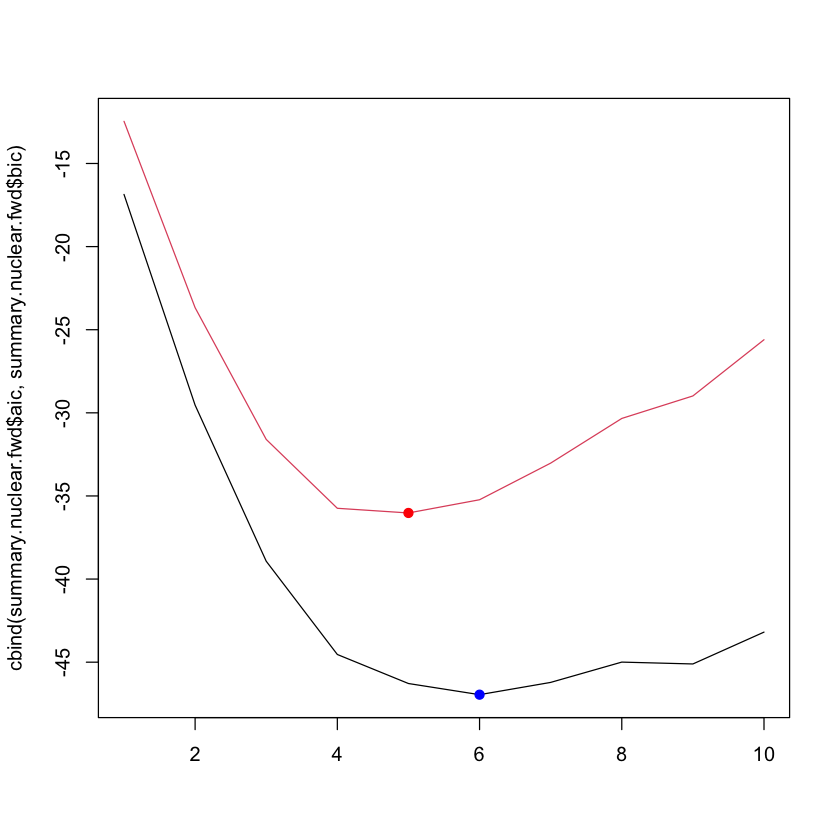

In [102]:
n <- nrow(nuclear.data) # number of observations

summary.nuclear.fwd$aic = summary.nuclear.fwd$bic-log(n)*(c(1:nvmax)+2)+2*(c(1:nvmax)+2)

par(bg="white")
matplot(cbind(summary.nuclear.fwd$aic,summary.nuclear.fwd$bic),type="l",lty=1)
p.aic = which.min(summary.nuclear.fwd$aic)
p.bic = which.min(summary.nuclear.fwd$bic)

points(c(p.aic, p.bic),
       c(summary.nuclear.fwd$aic[p.aic], summary.nuclear.fwd$bic[p.bic]),
       col=c("blue", "red"), pch=19)

In [113]:
# finding out which covariates AIC and BIC have chosen
best_model_fwd_aic <- which.min(summary.nuclear.fwd$aic)
best_model_fwd_bic <- which.min(summary.nuclear.fwd$bic)

# getting the names
selected_vars_aic <- names(which(summary.nuclear.fwd$which[best_model_fwd_aic, ]))[-1] # no intercept
selected_vars_bic <- names(which(summary.nuclear.fwd$which[best_model_fwd_bic, ]))[-1] # no intercept

cat("Best models, AIC:", selected_vars_aic, "\n")
cat("Best model, BIC:", selected_vars_bic, "\n")


Best models, AIC: date cap ne ct cum.n pt 
Best model, BIC: date cap ne ct pt 


We see here that both AIC and BIC have chosen the covariates `date, cap, ne, pt`. This is very much in line with the significance star codes in the summary.

In [114]:
nvmax = ncol(nuclear.data) - 1
nuclear.bwd <- regsubsets(log(cost) ~ ., data=nuclear.data, nvmax=nvmax, method="backward")
summary.nuclear.bwd <- summary(nuclear.bwd)
summary.nuclear.bwd

Subset selection object
Call: regsubsets.formula(log(cost) ~ ., data = nuclear.data, nvmax = nvmax, 
    method = "backward")
10 Variables  (and intercept)
      Forced in Forced out
date      FALSE      FALSE
t1        FALSE      FALSE
t2        FALSE      FALSE
cap       FALSE      FALSE
pr        FALSE      FALSE
ne        FALSE      FALSE
ct        FALSE      FALSE
bw        FALSE      FALSE
cum.n     FALSE      FALSE
pt        FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          date t1  t2  cap pr  ne  ct  bw  cum.n pt 
1  ( 1 )  " "  " " " " " " " " " " " " " " " "   "*"
2  ( 1 )  " "  " " " " "*" " " " " " " " " " "   "*"
3  ( 1 )  "*"  " " " " "*" " " " " " " " " " "   "*"
4  ( 1 )  "*"  " " " " "*" " " "*" " " " " " "   "*"
5  ( 1 )  "*"  " " " " "*" " " "*" "*" " " " "   "*"
6  ( 1 )  "*"  " " " " "*" " " "*" "*" " " "*"   "*"
7  ( 1 )  "*"  " " "*" "*" " " "*" "*" " " "*"   "*"
8  ( 1 )  "*"  " " "*" "*" "*" "*" "*" " " "*"   "*"
9  ( 1 )

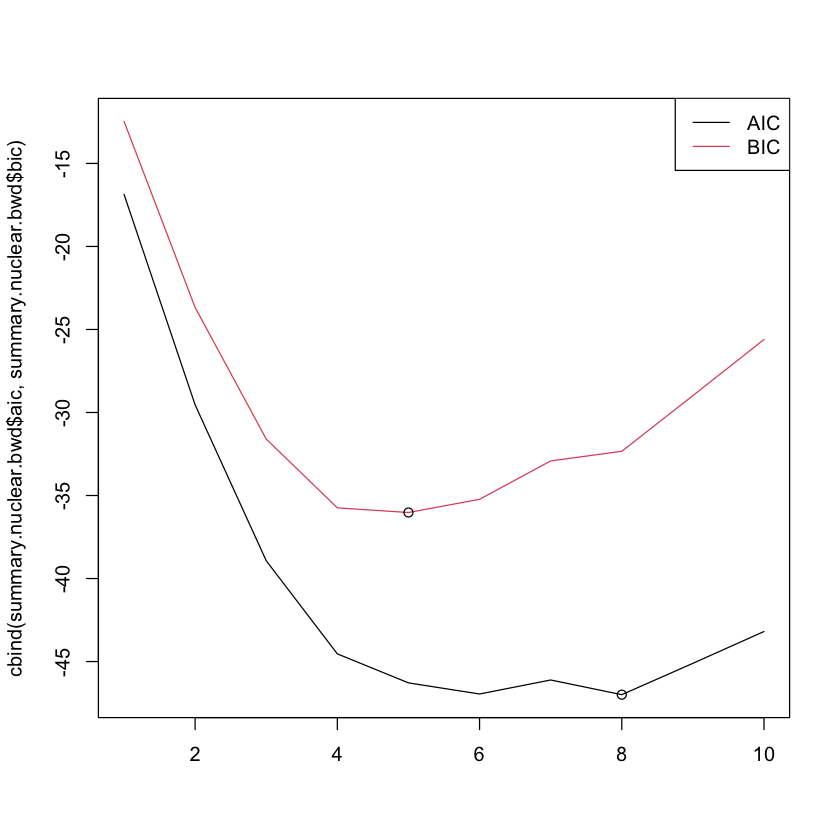

In [115]:
n <- nrow(nuclear.data) # number of observations

summary.nuclear.bwd$aic = summary.nuclear.bwd$bic-log(n)*(c(1:nvmax)+2)+2*(c(1:nvmax)+2)

par(bg="white")
matplot(cbind(summary.nuclear.bwd$aic,summary.nuclear.bwd$bic),type="l",lty=1)

p.aic = which.min(summary.nuclear.bwd$aic)
p.bic = which.min(summary.nuclear.bwd$bic)

points(c(p.aic,p.bic),
       c(summary.nuclear.bwd$aic[p.aic],summary.nuclear.bwd$bic[p.bic]))
legend("topright",c("AIC","BIC"),lty=1,col=1:3,)


In [112]:
best_model_bwd_aic <- which.min(summary.nuclear.bwd$aic)
best_model_bwd_bic <- which.min(summary.nuclear.bwd$bic)

selected_vars_aic <- names(which(summary.nuclear.bwd$which[best_model_bwd_aic, ]))[-1]  
selected_vars_bic <- names(which(summary.nuclear.bwd$which[best_model_bwd_bic, ]))[-1] 

cat("Best models, AIC:", selected_vars_aic, "\n")
cat("Best model, BIC:", selected_vars_bic, "\n")


Best models, AIC: date t2 cap pr ne ct cum.n pt 
Best model, BIC: date cap ne ct pt 


In [121]:
K <- 10
N <- nrow(nuclear.data)

index <- sample(rep(1:K, ceiling(N/K))[1:N]) 

selected_vars_fwd_aic <- names(which(summary.nuclear.fwd$which[best_model_fwd_aic, ]))[-1]
selected_vars_fwd_bic <- names(which(summary.nuclear.fwd$which[best_model_fwd_bic, ]))[-1]
selected_vars_bwd_aic <- names(which(summary.nuclear.bwd$which[best_model_bwd_aic, ]))[-1]
selected_vars_bwd_bic <- names(which(summary.nuclear.bwd$which[best_model_bwd_bic, ]))[-1]

models <- list(
  "FWD_AIC" = selected_vars_fwd_aic,
  "FWD_BIC" = selected_vars_fwd_bic,
  "BWD_AIC" = selected_vars_bwd_aic,
  "BWD_BIC" = selected_vars_bwd_bic
)

Err.Kcv <- matrix(0, nrow=length(models), ncol=K)
rownames(Err.Kcv) <- names(models)

for (m in 1:length(models)) {
  formula_str <- paste("log(cost) ~", paste(models[[m]], collapse=" + "))
  
  for (k in 1:K) {
    model <- lm(as.formula(formula_str), data=nuclear.data, subset=(1:N)[-which(index == k)])
    
    for (i in which(index == k)) {
      y_true <- log(nuclear.data$cost[i]) # Faktisk verdi
      x_test <- nuclear.data[i, models[[m]], drop=FALSE] # Testdata
      y_pred <- predict(model, newdata=x_test) # Prediksjon
      
      Err.Kcv[m, k] <- Err.Kcv[m, k] + (y_true - y_pred)^2 / N
    }
  }
}

cv_errors <- rowMeans(Err.Kcv)

cat("Cross-validation MSE for each model:\n")
print(cv_errors)


Cross-validation MSE for each model:
    FWD_AIC     FWD_BIC     BWD_AIC     BWD_BIC 
0.004098041 0.003672967 0.004599139 0.003672967 


From the MSE for these four models, we see that `FWD_BIC` and `BWD_BIC` are the same, and they have the best result.

In [120]:
## Bootstrap 
